In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15
import numpy as np
import sklearn as sk

(100,)


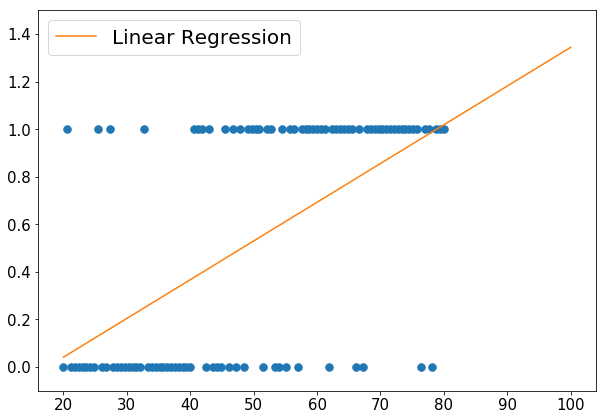

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

def logistic (x):
    return np.exp(0.08*(x-50))/(1.+np.exp(0.08*(x-50)))

ages = np.linspace(20,80,100)
ages2 = np.linspace(20,100,100)
p = logistic(ages)
owner = []

np.random.seed(10)
for idx in xrange(p.shape[0]):
    uni = np.random.uniform(0,1)
    own = 0
    if uni<p[idx]:
        own = 1
    owner.append(own)
    
lin = LinearRegression(fit_intercept=True)
log = LogisticRegression()

lin.fit(np.array(ages).reshape(-1, 1),np.array(owner))
log.fit(np.array(ages).reshape(-1, 1),np.array(owner))

y_pred_lin = lin.predict(np.array(ages2).reshape(-1, 1))
y_pred_log = log.predict_proba(np.array(ages2).reshape(-1, 1))[:,1]
y_pred_log0 = log.predict_proba(np.array(ages2).reshape(-1, 1))[:,0]
print y_pred_log.shape


plt.ylim([-0.1,1.5])
# plt.plot(ages,p,'-',label = 'True Probability')
plt.plot(ages,owner,'.')
plt.plot(ages2,y_pred_lin,'-',label='Linear Regression')
# plt.plot(ages2,y_pred_log,'-',label='Logistic Regression p1')
# plt.plot(ages2,y_pred_log0,'-',label='Logistic Regression p0')
plt.legend(prop={'size':20})



ImportError: No module named graphviz

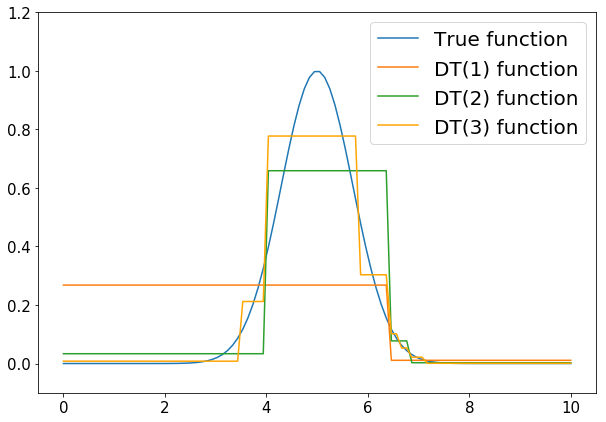

In [3]:
from sklearn.tree import DecisionTreeRegressor

def gauss (x):
    sigma = 1.
    mu = 5.
    norm = 1
    return norm*np.exp(-(x-mu)**2/sigma**2)

x = np.linspace(0,10,100).reshape(-1, 1)
y = gauss(x)

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=2)
dt3 = DecisionTreeRegressor(max_depth=3)
dt1.fit(x,y)
dt2.fit(x,y)
dt3.fit(x,y)
y_pred1 = dt1.predict(x)
y_pred2 = dt2.predict(x)
y_pred3 = dt3.predict(x)


plt.ylim([-0.1,1.2])
plt.plot(x,y,'-',label='True function')
plt.plot(x,y_pred1,'-',label='DT(1) function')
plt.plot(x,y_pred2,'-',label='DT(2) function')
plt.plot(x,y_pred3,'-',label='DT(3) function',c='orange')


plt.legend(prop={'size':20})

from graphviz import Source
from sklearn.tree import export_graphviz
out = Source(export_graphviz(dt3,out_file=None))
out.render('test.gv', view=True)

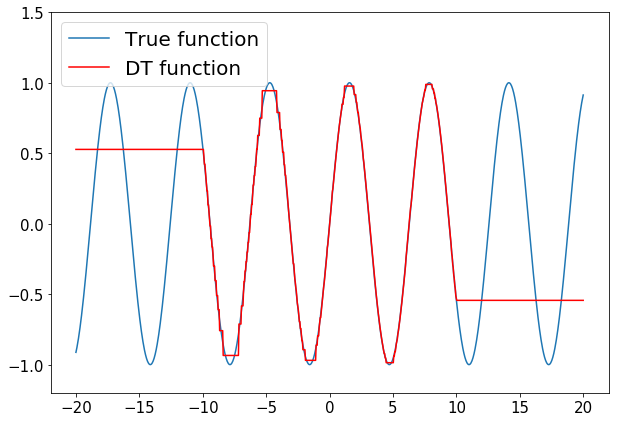

In [4]:
def sin (x):
    return np.sin(x)

x = np.linspace(-10,10,1000).reshape(-1, 1)
x_out = np.linspace(-20,20,1000).reshape(-1, 1)
y = sin(x)
y_out = sin(x_out)

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(x,y)
y_pred = dt.predict(x_out)


plt.ylim([-1.2,1.5])
plt.plot(x_out,y_out,'-',label='True function')
plt.plot(x_out,y_pred,'-',label='DT function',c='red')


plt.legend(prop={'size':20})

(100,)


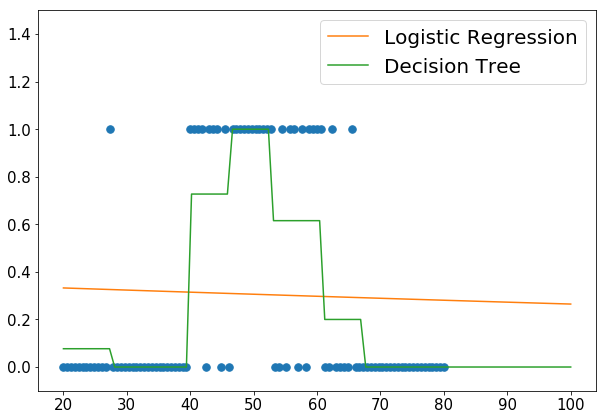

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def gauss (x):
    sigma = 10.
    mu = 50.
    norm = 0.95
    return   norm*np.exp(-(x-mu)**2/sigma**2)

ages = np.linspace(20,80,100)
ages2 = np.linspace(20,100,100)
p = gauss(ages)

owner = []

np.random.seed(10)
for idx in xrange(p.shape[0]):
    uni = np.random.uniform(0,1)
    own = 0
    if uni<p[idx]:
        own = 1
    owner.append(own)
    
log = LogisticRegression()
dt = DecisionTreeClassifier(min_samples_leaf=10)

log.fit(np.array(ages).reshape(-1, 1),np.array(owner))
dt.fit(np.array(ages).reshape(-1, 1),np.array(owner))

y_pred_log = log.predict_proba(np.array(ages2).reshape(-1, 1))[:,1]
y_pred_dt = dt.predict_proba(np.array(ages2).reshape(-1, 1))[:,1]
print y_pred_log.shape


plt.ylim([-0.1,1.5])
# plt.plot(ages,p,'-',label = 'True Probability')
plt.plot(ages,owner,'.')
plt.plot(ages2,y_pred_log,'-',label='Logistic Regression')
plt.plot(ages2,y_pred_dt,'-',label='Decision Tree')
plt.legend(prop={'size':20})

'test.gv.pdf'